In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Предобработка

In [3]:
df = pd.read_csv("data/train.csv")
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [ ]:
df.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

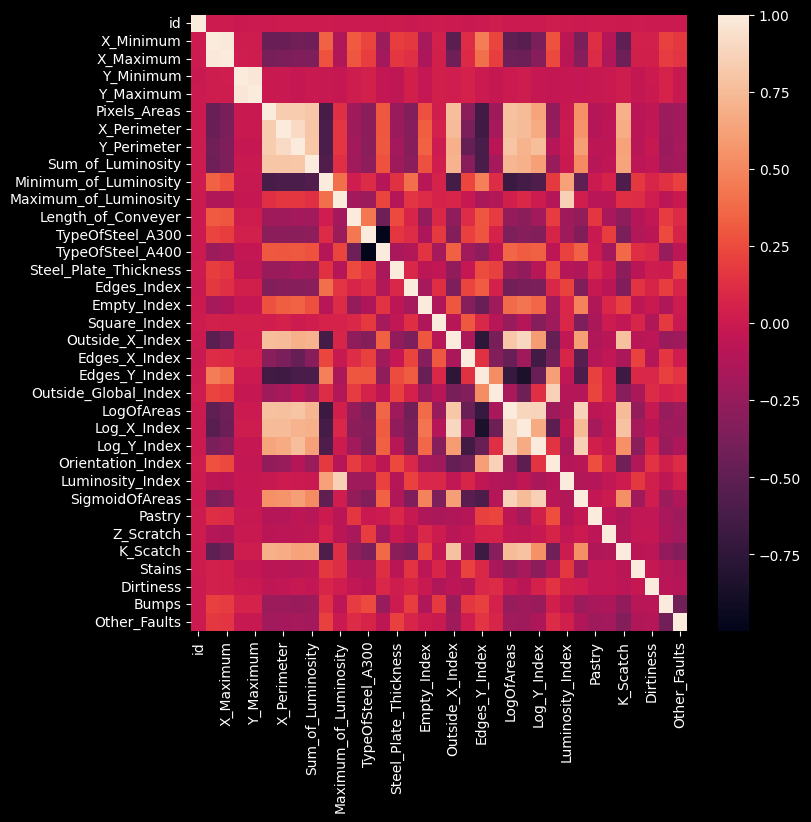

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())
plt.show()

In [4]:
df['X_avg'] = (df['X_Maximum'] + df['X_Minimum']) / 2
df['Y_avg'] = (df['Y_Maximum'] + df['Y_Minimum']) / 2

In [5]:
df.drop(['id', 'X_Maximum', 'X_Minimum', 'Y_Maximum', 'Y_Minimum', 'TypeOfSteel_A300'], inplace=True, axis=1)

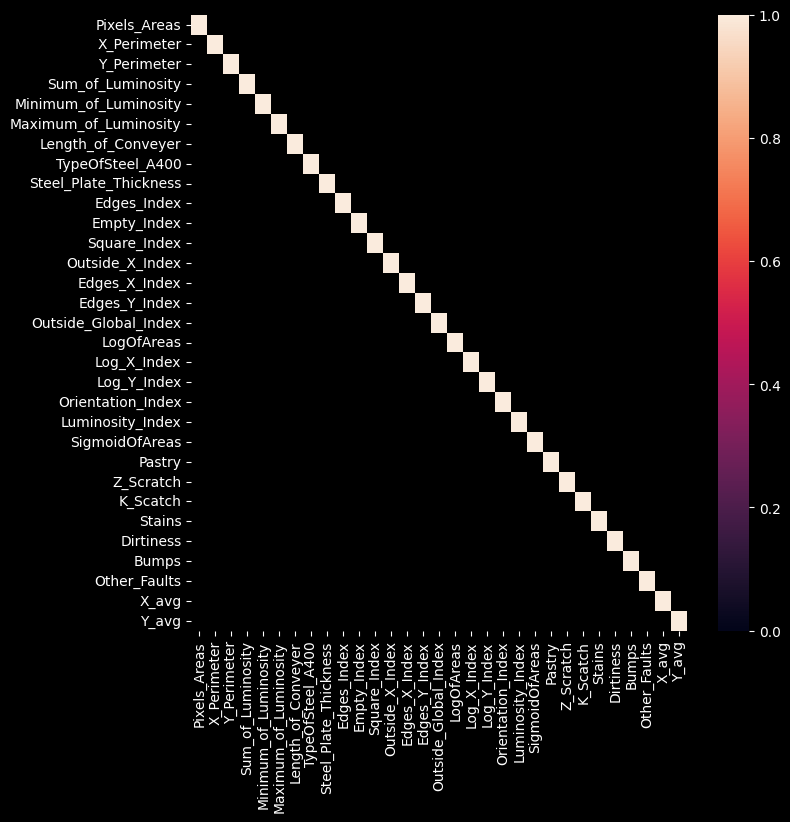

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr()[np.abs(df.corr()) > 0.95], vmin=0, vmax=1)
plt.show()

In [6]:
targets_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [7]:
features = ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
            'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
            'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index',
            'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
            'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index',
            'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
            'SigmoidOfAreas', 'X_avg', 'Y_avg']

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(df[features])
df[features] = pd.DataFrame(scaled_features, columns=features)

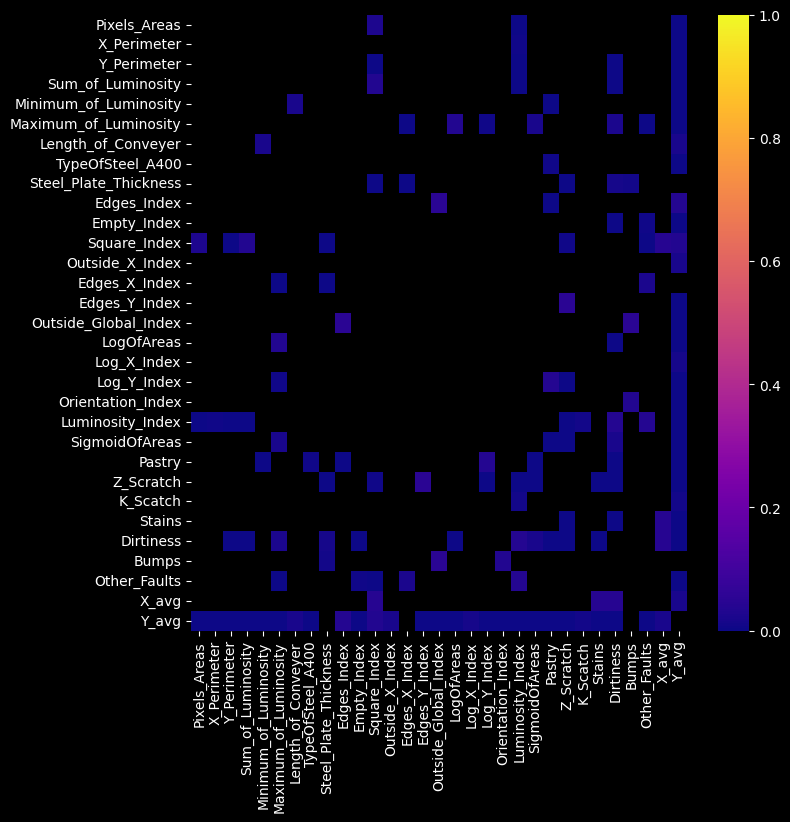

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap((df.corr())[np.abs(df.corr()) < 0.05], vmin=0, vmax=1, cmap='plasma')
plt.show()

In [ ]:
for col in targets_cols:
    print(df[col].value_counts())

Pastry
0    17753
1     1466
Name: count, dtype: int64
Z_Scratch
0    18069
1     1150
Name: count, dtype: int64
K_Scatch
0    15787
1     3432
Name: count, dtype: int64
Stains
0    18651
1      568
Name: count, dtype: int64
Dirtiness
0    18734
1      485
Name: count, dtype: int64
Bumps
0    14456
1     4763
Name: count, dtype: int64
Other_Faults
0    12661
1     6558
Name: count, dtype: int64


In [10]:
Y = df[targets_cols]
X = df.drop(targets_cols, axis=1)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
train = x_train.copy()
train[targets_cols] = y_train

In [13]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(train)

metadata.validate_data(data=train)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(train)

synthetic_data = synthesizer.sample(num_rows=15000)

from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 31/31 [00:00<00:00, 219.81it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 60.36it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [14]:
train = pd.concat([train, synthetic_data], ignore_index=True)

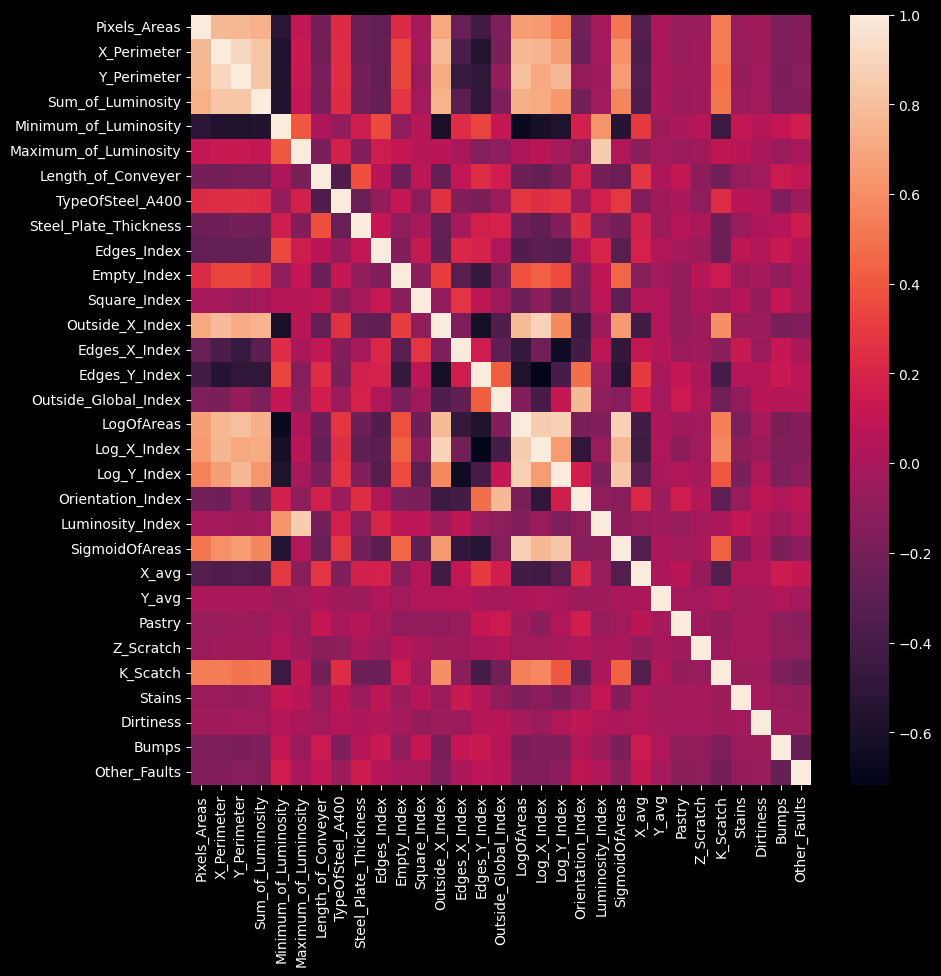

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr())
plt.show()

In [ ]:
train[targets_cols].value_counts()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               8183
                                                1      0               5880
                                                0      0               4930
                   1         0       0          0      0               4070
1       0          0         0       0          0      0               1647
                                                                       ... 
0       0          1         1       0          1      1                  1
1       0          0         0       1          1      1                  1
0       1          1         0       1          0      1                  1
1       0          1         0       1          1      0                  1
        1          1         0       0          0      1                  1
Name: count, Length: 72, dtype: int64

In [15]:
x_train = train.drop(columns= targets_cols)
y_train = train[targets_cols]

# Обучение

In [ ]:
features_for_targets = {}
for target in targets_cols:
    features_for_targets[target] = []

for target in targets_cols:
    for feature in features:
        corr_val = df[target].corr(df[feature])
        if (corr_val > 0.01) and (corr_val < 0.95):
            features_for_targets[target].append(feature)

features_for_targets

{'Pastry': ['Length_of_Conveyer',
  'Steel_Plate_Thickness',
  'Edges_Y_Index',
  'Outside_Global_Index',
  'Orientation_Index',
  'X_avg'],
 'Z_Scratch': ['Minimum_of_Luminosity',
  'Empty_Index',
  'Outside_Global_Index',
  'Orientation_Index'],
 'K_Scatch': ['Pixels_Areas',
  'X_Perimeter',
  'Y_Perimeter',
  'Sum_of_Luminosity',
  'Maximum_of_Luminosity',
  'TypeOfSteel_A400',
  'Empty_Index',
  'Outside_X_Index',
  'LogOfAreas',
  'Log_X_Index',
  'Log_Y_Index',
  'SigmoidOfAreas'],
 'Stains': ['Minimum_of_Luminosity',
  'Maximum_of_Luminosity',
  'TypeOfSteel_A400',
  'Edges_Index',
  'Square_Index',
  'Edges_X_Index',
  'Edges_Y_Index',
  'Luminosity_Index'],
 'Dirtiness': ['Minimum_of_Luminosity',
  'TypeOfSteel_A400',
  'Edges_Index',
  'Edges_Y_Index',
  'Outside_Global_Index',
  'Log_Y_Index',
  'Orientation_Index'],
 'Bumps': ['Minimum_of_Luminosity',
  'Length_of_Conveyer',
  'Edges_Index',
  'Square_Index',
  'Edges_X_Index',
  'Edges_Y_Index',
  'X_avg',
  'Y_avg'],
 'Ot

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [17]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    
    model.fit(x_train, y_train)
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    roc_auc = roc_auc_score(y_test, y_pred_prob)
    precision = precision_score(y_pred, y_test)
    accuracy = accuracy_score(y_pred, y_test)

    return accuracy, precision, roc_auc

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
results = {}

for target in targets_cols:
    print(f'\n-=-=-=-= Target: {target} =-=-=-=-=-\n')

    result = {'models': {}, 'metrics': {}}

    models = { 
        "Random Forest Classifier": RandomForestClassifier(),
        "MLP Classifier": MLPClassifier(max_iter=1000), 
        "XGBoost Classifier": xgb.XGBClassifier()
    }

    for name, model in models.items():
        smote = SMOTE(random_state=42)
        x_train_balanced, y_train_balanced = smote.fit_resample(x_train[features_for_targets[target]], y_train[[target]])

        accuracy, precision, roc_auc = evaluate_model(model, 
                                            x_train_balanced, y_train_balanced,  
                                            x_test[features_for_targets[target]], y_test[[target]])
        
        result['metrics'][name] = {'accuracy': accuracy, 'precision': precision, 'roc_auc': roc_auc}
        result['models'][name] = model
    
    for model_name, metrics in result['metrics'].items():
        print(f"{model_name} - accuracy: {metrics['accuracy']:.4f}, precision: {metrics['precision']:.4f}, roc_auc: {metrics['roc_auc']:.4f}")

    results[target] = result


-=-=-=-= Target: Pastry =-=-=-=-=-

Random Forest Classifier - accuracy: 0.8866, precision: 0.2924, roc_auc: 0.6147
MLP Classifier - accuracy: 0.7136, precision: 0.8272, roc_auc: 0.7656
XGBoost Classifier - accuracy: 0.8590, precision: 0.4817, roc_auc: 0.6864

-=-=-=-= Target: Z_Scratch =-=-=-=-=-

Random Forest Classifier - accuracy: 0.8660, precision: 0.1773, roc_auc: 0.5426
MLP Classifier - accuracy: 0.5861, precision: 0.7636, roc_auc: 0.6695
XGBoost Classifier - accuracy: 0.8353, precision: 0.2364, roc_auc: 0.5540

-=-=-=-= Target: K_Scatch =-=-=-=-=-

Random Forest Classifier - accuracy: 0.9599, precision: 0.9106, roc_auc: 0.9406
MLP Classifier - accuracy: 0.9545, precision: 0.9282, roc_auc: 0.9442
XGBoost Classifier - accuracy: 0.9573, precision: 0.9091, roc_auc: 0.9384

-=-=-=-= Target: Stains =-=-=-=-=-

Random Forest Classifier - accuracy: 0.9607, precision: 0.6400, roc_auc: 0.8046
MLP Classifier - accuracy: 0.8231, precision: 0.8900, roc_auc: 0.8557
XGBoost Classifier - accu

# Сборка Франкенштейна

In [ ]:
models_for_targets = {
    'Pastry': 'XGBoost Classifier', 
    'Z_Scratch': 'XGBoost Classifier', 
    'K_Scatch': 'Random Forest Classifier', 
    'Stains': 'Random Forest Classifier', 
    'Dirtiness': 'XGBoost Classifier', 
    'Bumps': 'XGBoost Classifier', 
    'Other_Faults': 'XGBoost Classifier'
}

In [ ]:
def predict(X, models_for_targets, features_for_targets, results, targets):
    res = np.zeros((X.shape[0], 7))
    
    for index, target in enumerate(targets):
        y_pred_prob = results[target]['models'][models_for_targets[target]].predict(X[features_for_targets[target]])
        y_pred = (y_pred_prob > 0.5).astype("int32")

        res[::, index] = y_pred.reshape(y_pred.shape[0])

    return pd.DataFrame(res, columns=targets)

In [ ]:
y_pred = predict(x_test, models_for_targets, features_for_targets, results, targets_cols)

In [ ]:
accuracy_score(y_pred, y_test), precision_score(y_pred, y_test, average='weighted')

(0.31399583766909467, 0.6164390728375778)

# Единая FFNN

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [19]:
model = Sequential([
    layers.Input(shape=(24,)),
    layers.Dropout(0.1), 
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.1), 
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), 
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1), 
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='sigmoid')
])

In [20]:
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=loss, metrics=['accuracy', 'precision'])

In [22]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.3851 - loss: 0.3009 - precision: 0.7345
Epoch 2/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.3830 - loss: 0.2997 - precision: 0.7084
Epoch 3/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.3920 - loss: 0.2968 - precision: 0.7151
Epoch 4/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3925 - loss: 0.2960 - precision: 0.7060
Epoch 5/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3930 - loss: 0.2955 - precision: 0.7034


In [23]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'accuracy = {accuracy:.4f}    precision = {precision:.4f}')

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
accuracy = 0.2581    precision = 0.6307


# test

In [24]:
from tf_fourier_features import FourierFeatureProjection

In [25]:
model = Sequential([
    layers.Input(shape=(24,)),
    FourierFeatureProjection(gaussian_projection = 256, gaussian_scale = 1.0), 
    layers.Dropout(0.1), 
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.1), 
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), 
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1), 
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='sigmoid')
])

In [26]:
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=loss, metrics=['accuracy', 'precision'])

In [27]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.3074 - loss: 0.3442 - precision: 0.5714
Epoch 2/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.3561 - loss: 0.3133 - precision: 0.8208
Epoch 3/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.3695 - loss: 0.3034 - precision: 0.7930
Epoch 4/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.3920 - loss: 0.2935 - precision: 0.7396
Epoch 5/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4260 - loss: 0.2785 - precision: 0.7003


In [28]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'accuracy = {accuracy:.4f}    precision = {precision:.4f}')

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
accuracy = 0.2622    precision = 0.5216
